In [1]:
import pandas as pd, numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']
enc = OneHotEncoder()
enc.fit(df[cat_features])
enc.categories_
tranformed = enc.transform(df[cat_features]).toarray()
columns = num_features + enc.get_feature_names(cat_features).tolist()
columns

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [4]:
X = np.concatenate((df[num_features], tranformed), axis=1)
y = df.charges

Text(0.5, 1.0, 'Feature Importances')

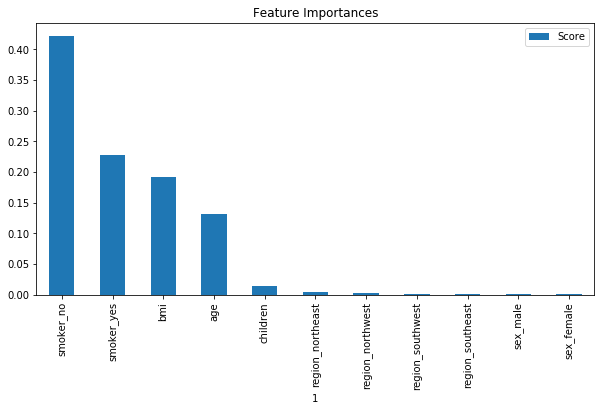

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
r2_score(y_test, predicted)
fi = pd.DataFrame(sorted(list(zip(rf.feature_importances_, columns)), reverse=True))
fi = fi.set_index(1)
fi.columns = ['Score']
fi.plot(kind='bar', figsize=(10,5))
plt.title('Feature Importances')

In [6]:
enc.get_feature_names(['sex', 'smoker', 'region'])

array(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [7]:

df.iloc[0, :].index

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0, 0.5, 'Charges')

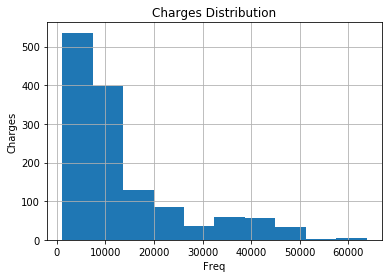

In [8]:
import matplotlib.pyplot as plt
# %matplotlib notebook
df.charges.hist(bins=10)
plt.title('Charges Distribution')
plt.xlabel('Freq')
plt.ylabel('Charges')